In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Matplotlib의 폰트를 Nanum 폰트로 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 폰트가 제대로 로드되었는지 확인
plt.figure(figsize=(10, 2))
plt.title('한글 테스트: 폰트가 정상적으로 작동합니다')
plt.show()


- Directory Path 저장

In [ ]:
input_folder = ""
output_folder = ""

In [ ]:
dir_list = ["21대 총선 더불어민주당", "21대 총선 미래통합당",
            "20대 총선 새누리당", "20대 총선 더불어민주당", "20대 총선 국민의당",
            "19대 총선 새누리당", "19대 총선 민주통합당",
            "18대 총선 한나라당", "18대 총선 통합민주당",
            "17대 총선 한나라당", "17대 총선 열린우리당",
            "16대 총선 한나라당", "16대 총선 새천년민주당",
            "8대 지선 기초 더불어민주당", "8대 지선 기초 국민의힘", "8대 지선 광역 더불어민주당", "8대 지선 광역 국민의힘",
            "7대 지선 기초 자유한국당", "7대 지선 기초 더불어민주당", "7대 지선 광역 자유한국당", "7대 지선 광역 더불어민주당",
            "6대 지선 기초 새정치민주연합", "6대 지선 기초 새누리당", "6대 지선 광역 새정치민주연합", "6대 지선 광역 새누리당",
            "5대 지선 기초 한나라당", "5대 지선 기초 민주당", "5대 지선 광역 한나라당", "5대 지선 광역 민주당",
            "4대 지선 기초 한나라당", "4대 지선 기초 열린우리당", "4대 지선 광역 한나라당", "4대 지선 광역 열린우리당", "4대 지선 기초 민주당", "4대 지선 광역 민주당" ,
            "3대 지선 기초 한나라당", "3대 지선 기초 새천년민주당", "3대 지선 광역 한나라당", "3대 지선 광역 새천년민주당"]

#  **인접 색상 사용 수치화**

In [ ]:
party_colors_by_election = {
    "21대 총선 더불어민주당": (0, 78, 161),
    "21대 총선 미래통합당": (239, 66, 111),
    "20대 총선 더불어민주당": (0, 78, 161),
    "20대 총선 새누리당": (201, 37, 43),
    "19대 총선 민주통합당": (255, 213, 4),
    "19대 총선 새누리당": (201, 37, 43),
    "18대 총선 통합민주당": (65, 150, 57),
    "18대 총선 한나라당": (0, 149, 218),
    "17대 총선 열린우리당": (255, 217, 24),
    "17대 총선 한나라당": (0, 149, 218),
    "16대 총선 새천년민주당": (0, 170, 123),
    "16대 총선 한나라당": (0, 0, 168),
    "8대 지선 기초 더불어민주당": (0, 78, 161),
    "8대 지선 기초 국민의힘": (230, 30, 43),
    "7대 지선 기초 더불어민주당": (0, 78, 161),
    "7대 지선 기초 자유한국당": (201, 21, 30),
    "6대 지선 기초 새정치민주연합": (0, 130, 205),
    "6대 지선 기초 새누리당": (201, 37, 43),
    "5대 지선 기초 민주당": (1, 158, 51),
    "5대 지선 기초 한나라당": (0, 149, 218),
    "4대 지선 기초 열린우리당": (255, 217, 24),
    "4대 지선 기초 한나라당": (0, 149, 218),
    "3대 지선 기초 새천년민주당": (0, 170, 123),
    "3대 지선 기초 한나라당": (0, 0, 168)
}

In [ ]:
import ast
import pandas as pd

# 각 정당의 color_vote_data를 불러와 party color 열을 추가하고 다시 저장하는 로직
for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_color_with_vote_data.csv"

    # color_vote_data 파일 불러오기
    color_vote_data = pd.read_csv(color_vote_path, encoding='utf-8')

    # 해당 정당의 대표색 가져오기
    party_rgb = party_colors_by_election.get(name)

    if party_rgb:
        # 'party color' 열에 대표색 값 추가 (모든 행에 동일한 값으로 채움)
        color_vote_data['party color'] = [party_rgb] * len(color_vote_data)

        # 수정된 CSV 파일 저장
        save_path = directory + "_all_data_with_party_color.csv"
        color_vote_data.to_csv(save_path, index=False, encoding='utf-8-sig')
        print(f"저장 완료: {save_path}")


저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/21대 총선 더불어민주당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/21대 총선 미래통합당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/20대 총선 더불어민주당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/20대 총선 새누리당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/19대 총선 민주통합당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/19대 총선 새누리당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/18대 총선 통합민주당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240506 test/색상 추출 파일/18대 총선 한나라당_all_data_with_party_color.csv
저장 완료: /content/drive/MyDrive/24-1/비주얼라이제이션/240

## 단순 유클리드 거리 사용 인접 색상 판단

### max distance = 50

In [ ]:
import ast
import pandas as pd
import math

def color_distance(rgb1, rgb2):
    """
    두 RGB 값 간의 유클리드 거리를 계산하여 색상 유사도를 측정하는 함수.
    rgb1: 비교 대상 1 (tuple) -> color_vote_data의 Color Code 1
    rgb2: 비교 대상 2 (tuple) -> 정당별 대표색
    """
    return math.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(rgb1, rgb2)))

def is_similar_color(rgb1, rgb2, max_distance):
    """
    유클리드 거리가 max_distance 이하이면 유사하다고 판단.
    """
    return color_distance(rgb1, rgb2) <= max_distance

# 여러 파일에 대해 작업
for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_all_data_with_party_color.csv"

    # color_vote_data 파일 불러오기
    data = pd.read_csv(color_vote_path, encoding='utf-8')

    # 새로운 열을 추가하기 위한 준비
    results = []

    # 각 행에 대해 Color Code 1과 party color의 비교
    for index, row in data.iterrows():
        color_code_1_rgb = ast.literal_eval(row['Color Code 1'])  # Color Code 1의 RGB 값 추출
        party_rgb = ast.literal_eval(row['party color'])  # Party color의 RGB 값 추출

        # 유클리드 거리를 사용하여 비교
        if is_similar_color(color_code_1_rgb, party_rgb, max_distance=50):  # max_distance 값을 조정할 수 있습니다
            results.append('O')
        else:
            results.append('X')

    # 결과를 새로운 열에 추가
    data['simple comparison 50'] = results

    # 수정된 CSV 파일 저장 (덮어쓰기)
    data.to_csv(color_vote_path, index=False, encoding='utf-8-sig')
    print(f"저장 완료: {color_vote_path}")

21대 총선 더불어민주당의 정당색 사용 벽보 개수 (유사도): 45, 정당색 사용 비율 (유사도): 18.07%


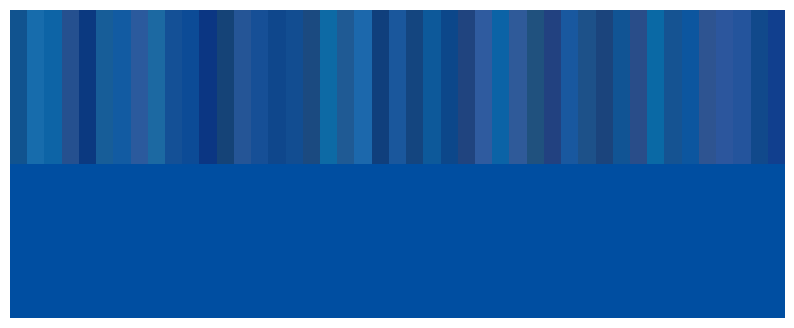

21대 총선 미래통합당의 정당색 사용 벽보 개수 (유사도): 21, 정당색 사용 비율 (유사도): 8.90%


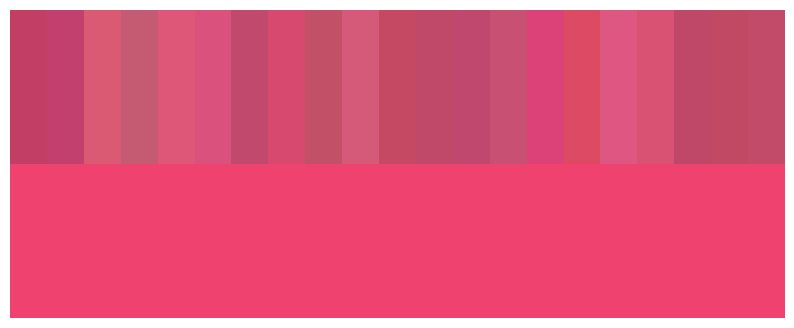

20대 총선 더불어민주당의 정당색 사용 벽보 개수 (유사도): 19, 정당색 사용 비율 (유사도): 8.37%


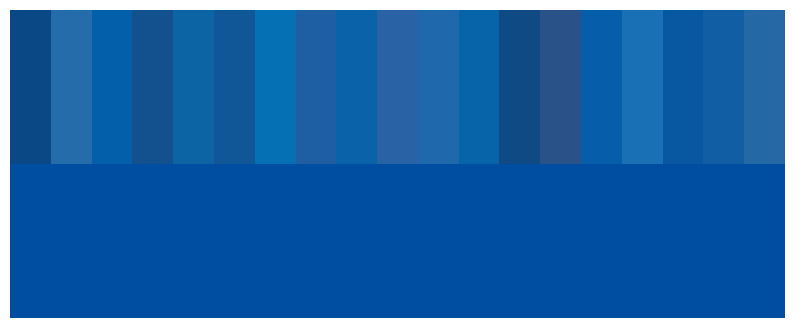

20대 총선 새누리당의 정당색 사용 벽보 개수 (유사도): 19, 정당색 사용 비율 (유사도): 7.76%


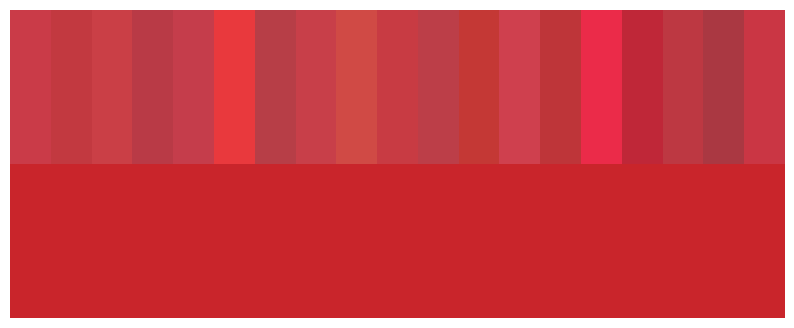

19대 총선 민주통합당의 정당색 사용 벽보 개수 (유사도): 27, 정당색 사용 비율 (유사도): 13.50%


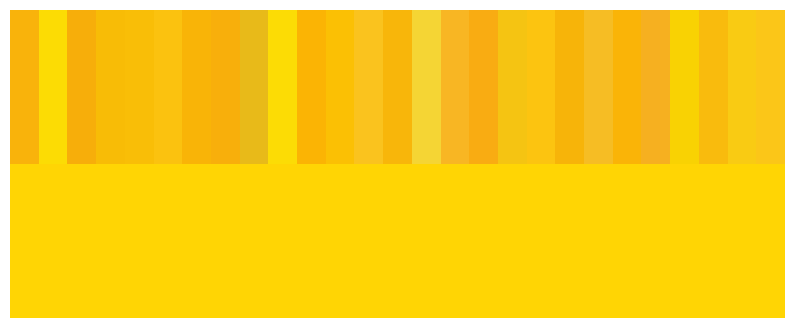

19대 총선 새누리당의 정당색 사용 벽보 개수 (유사도): 5, 정당색 사용 비율 (유사도): 2.26%


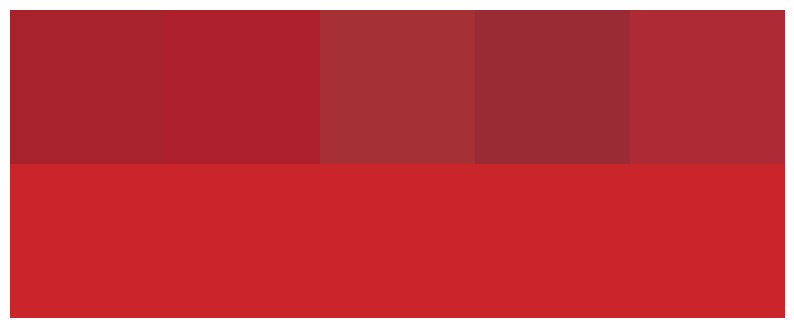

18대 총선 통합민주당의 정당색 사용 벽보 개수 (유사도): 10, 정당색 사용 비율 (유사도): 5.26%


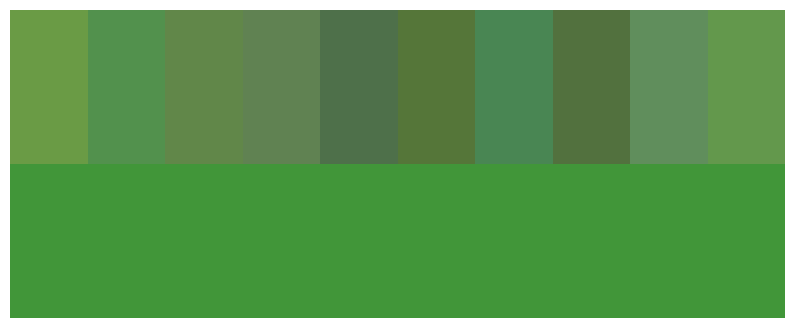

18대 총선 한나라당의 정당색 사용 벽보 개수 (유사도): 23, 정당색 사용 비율 (유사도): 9.47%


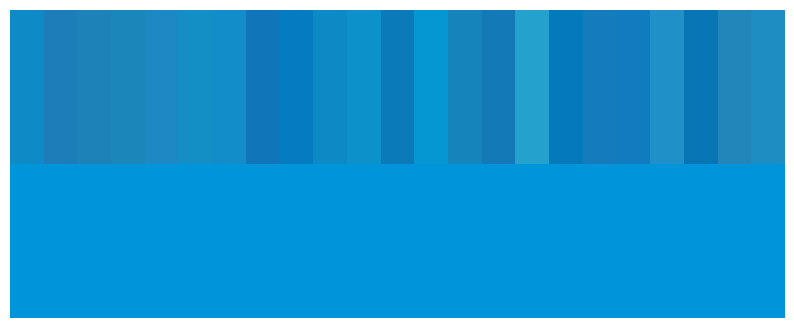

17대 총선 열린우리당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
17대 총선 열린우리당: 정당색을 사용한 벽보 없음.
17대 총선 한나라당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
17대 총선 한나라당: 정당색을 사용한 벽보 없음.
16대 총선 새천년민주당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
16대 총선 새천년민주당: 정당색을 사용한 벽보 없음.
16대 총선 한나라당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
16대 총선 한나라당: 정당색을 사용한 벽보 없음.
8대 지선 기초 더불어민주당의 정당색 사용 벽보 개수 (유사도): 6, 정당색 사용 비율 (유사도): 3.19%


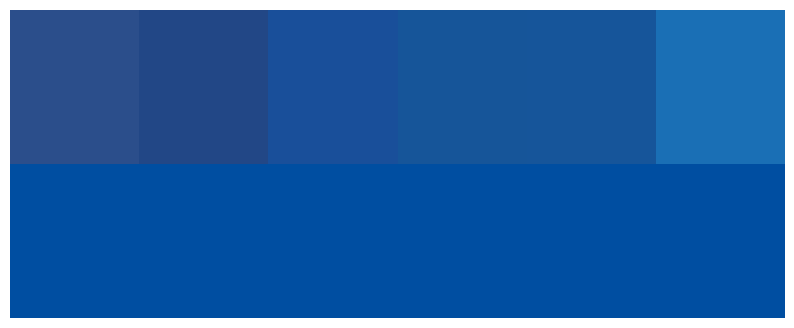

8대 지선 기초 국민의힘의 정당색 사용 벽보 개수 (유사도): 14, 정당색 사용 비율 (유사도): 7.73%


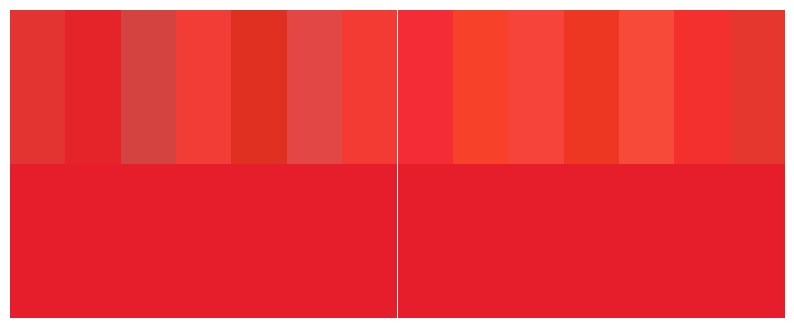

7대 지선 기초 더불어민주당의 정당색 사용 벽보 개수 (유사도): 14, 정당색 사용 비율 (유사도): 6.90%


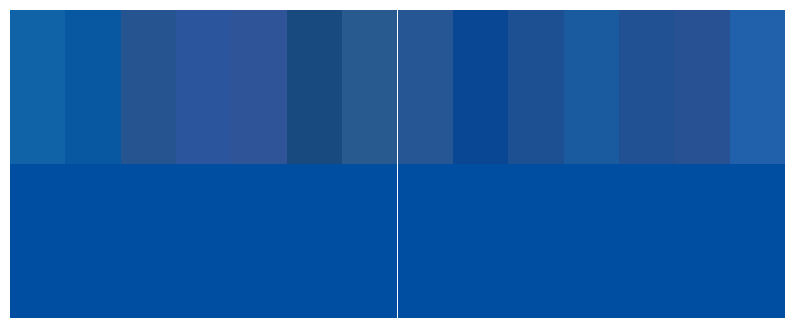

7대 지선 기초 자유한국당의 정당색 사용 벽보 개수 (유사도): 3, 정당색 사용 비율 (유사도): 1.73%


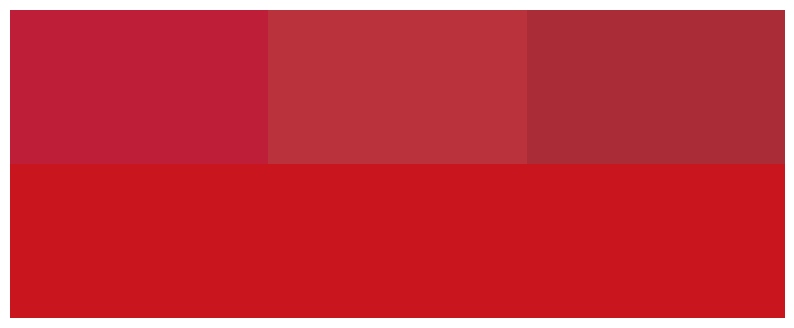

6대 지선 기초 새정치민주연합의 정당색 사용 벽보 개수 (유사도): 13, 정당색 사용 비율 (유사도): 7.93%


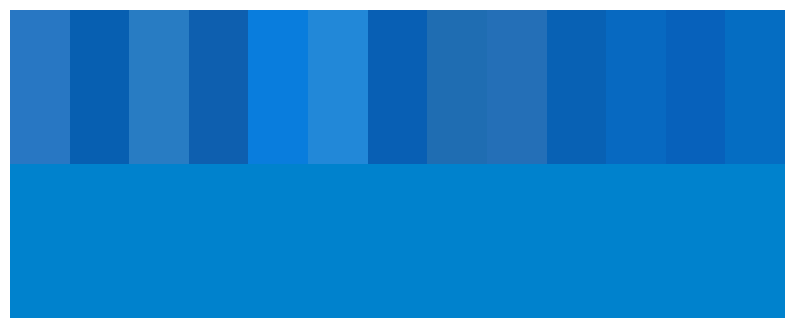

6대 지선 기초 새누리당의 정당색 사용 벽보 개수 (유사도): 22, 정당색 사용 비율 (유사도): 12.02%


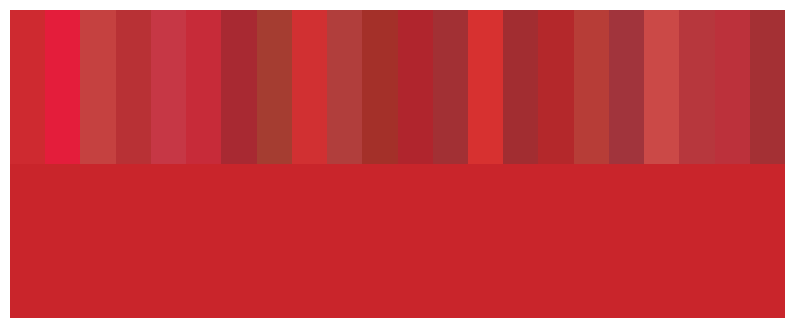

5대 지선 기초 민주당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
5대 지선 기초 민주당: 정당색을 사용한 벽보 없음.
5대 지선 기초 한나라당의 정당색 사용 벽보 개수 (유사도): 6, 정당색 사용 비율 (유사도): 3.45%


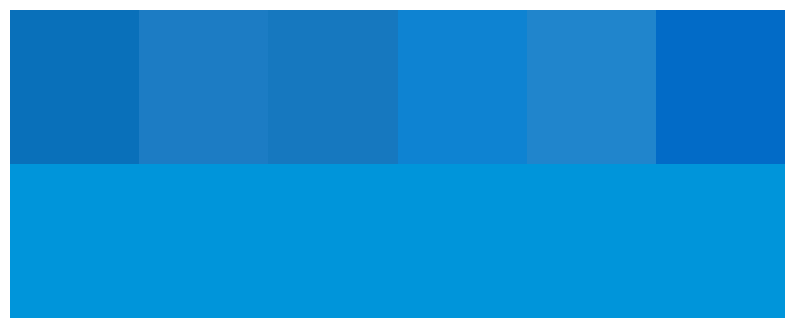

4대 지선 기초 열린우리당의 정당색 사용 벽보 개수 (유사도): 4, 정당색 사용 비율 (유사도): 2.27%


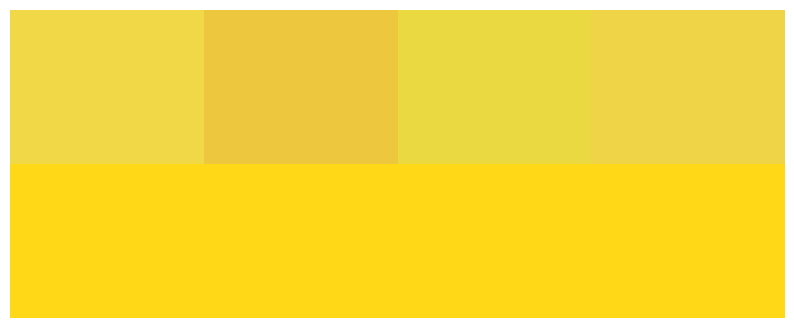

4대 지선 기초 한나라당의 정당색 사용 벽보 개수 (유사도): 1, 정당색 사용 비율 (유사도): 0.53%


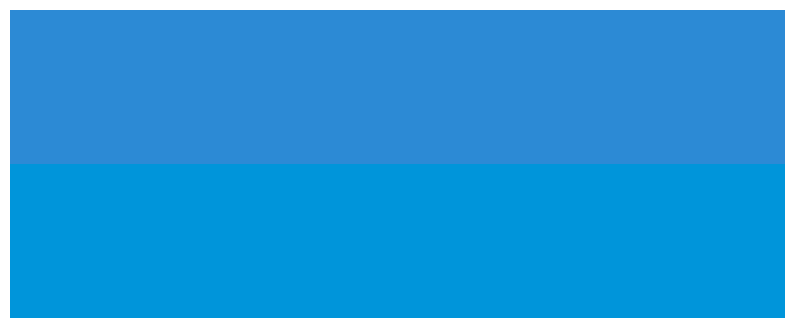

3대 지선 기초 새천년민주당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
3대 지선 기초 새천년민주당: 정당색을 사용한 벽보 없음.
3대 지선 기초 한나라당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
3대 지선 기초 한나라당: 정당색을 사용한 벽보 없음.


In [ ]:
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# O 개수와 퍼센트 계산 및 색상띠 출력

for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_all_data_with_party_color.csv"

    # CSV 파일 불러오기
    data = pd.read_csv(color_vote_path, encoding='utf-8')

    # simple comparison 50에서 'O'의 개수 세기
    O_count = (data['simple comparison 50'] == 'O').sum()
    O_percentage = (O_count / len(data)) * 100 if len(data) > 0 else 0

    # 개별 파일 결과 출력
    print(f"{name}의 정당색 사용 벽보 개수 (유사도): {O_count}, 정당색 사용 비율 (유사도): {O_percentage:.2f}%")

    # simple comparison 50에서 'O' 값인 행들의 Color Code 1 RGB 추출
    O_data = data[data['simple comparison 50'] == 'O']['Color Code 1'].apply(ast.literal_eval)

    # 정당의 party_color 추출
    party_rgb = ast.literal_eval(data['party color'].iloc[0])  # 모든 행에서 동일한 party color를 가져옴
    party_color = tuple(c / 255 for c in party_rgb)  # 정당의 대표색을 0-1 사이로 정규화

    # 색상띠를 만들기 위한 플롯 설정
    if len(O_data) > 0:  # 'O' 값이 있을 때만 색상띠 출력
        fig, ax = plt.subplots(figsize=(10, 4), dpi=100)  # 전체 플롯 크기 조정
        ax.set_xlim(0, len(O_data))
        ax.set_ylim(0, 2)  # 두 개의 띠를 표시하기 위해 세로 높이 2로 설정
        ax.axis('off')  # 축 표시 제거

        # 첫 번째 색상띠 (유사한 색상들)
        for i, rgb in enumerate(O_data):
            color = tuple(c / 255 for c in rgb)  # RGB 값을 0-1 사이로 정규화
            rect = patches.Rectangle((i, 1), 1, 1, facecolor=color)  # 상단에 유사한 색상 표시
            ax.add_patch(rect)

        # 두 번째 색상띠 (정당의 대표색)
        for i in range(len(O_data)):  # 아래에 동일한 party_color로 띠를 표시
            rect = patches.Rectangle((i, 0), 1, 1, facecolor=party_color)
            ax.add_patch(rect)

        # 색상띠 표시
        plt.show()
        plt.close(fig)
    else:
        print(f"{name}: 정당색을 사용한 벽보 없음.")

### max distance = 75

In [ ]:
for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_all_data_with_party_color.csv"

    # color_vote_data 파일 불러오기
    data = pd.read_csv(color_vote_path, encoding='utf-8')

    # 새로운 열을 추가하기 위한 준비
    results = []

    # 각 행에 대해 Color Code 1과 party color의 비교
    for index, row in data.iterrows():
        color_code_1_rgb = ast.literal_eval(row['Color Code 1'])  # Color Code 1의 RGB 값 추출
        party_rgb = ast.literal_eval(row['party color'])  # Party color의 RGB 값 추출

        # 유클리드 거리를 사용하여 비교
        if is_similar_color(color_code_1_rgb, party_rgb, max_distance=75):  # max_distance 값을 조정할 수 있습니다
            results.append('O')
        else:
            results.append('X')

    # 결과를 새로운 열에 추가
    data['simple comparison 75'] = results

    # 수정된 CSV 파일 저장 (덮어쓰기)
    data.to_csv(color_vote_path, index=False, encoding='utf-8-sig')
    print(f"저장 완료: {color_vote_path}")

21대 총선 더불어민주당의 정당색 사용 벽보 개수 (유사도): 77, 정당색 사용 비율 (유사도): 30.92%


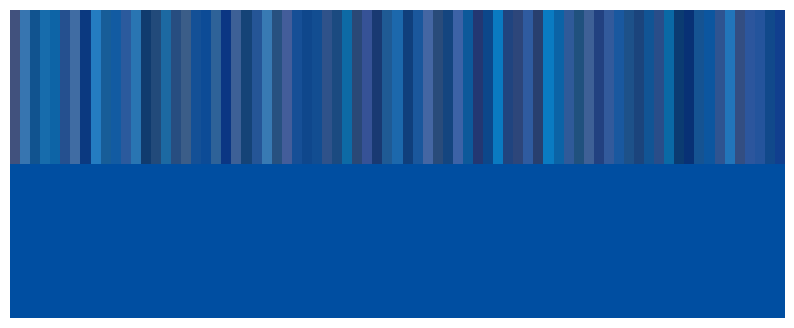

21대 총선 미래통합당의 정당색 사용 벽보 개수 (유사도): 57, 정당색 사용 비율 (유사도): 24.15%


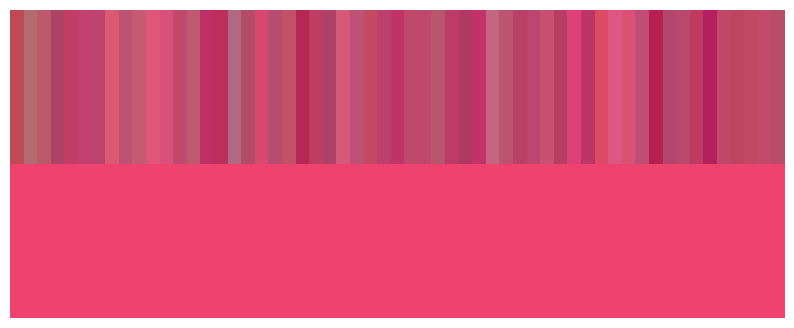

20대 총선 더불어민주당의 정당색 사용 벽보 개수 (유사도): 52, 정당색 사용 비율 (유사도): 22.91%


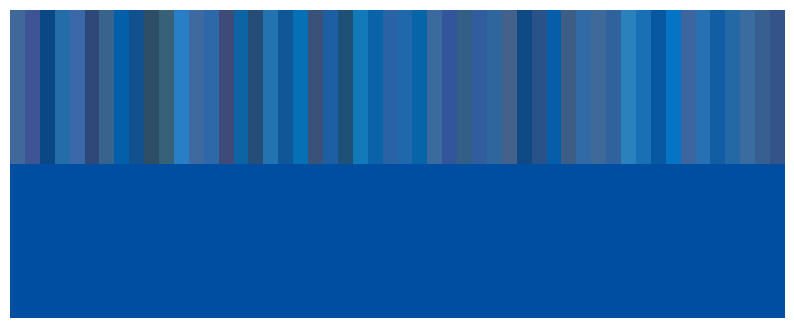

20대 총선 새누리당의 정당색 사용 벽보 개수 (유사도): 27, 정당색 사용 비율 (유사도): 11.02%


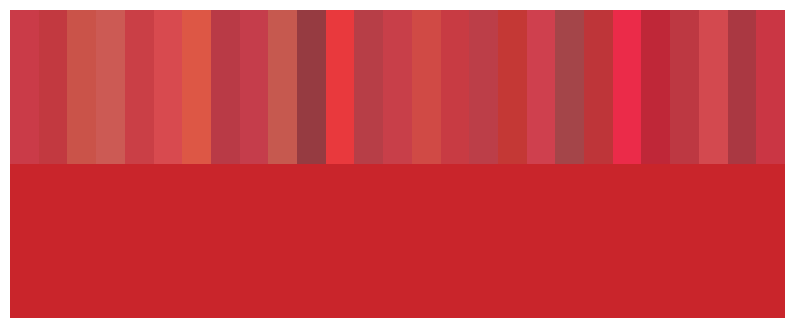

19대 총선 민주통합당의 정당색 사용 벽보 개수 (유사도): 50, 정당색 사용 비율 (유사도): 25.00%


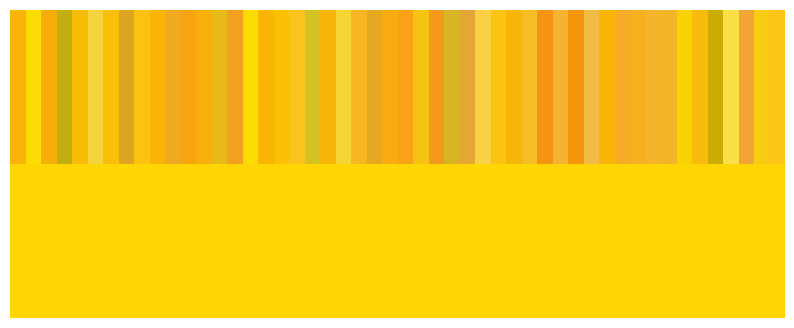

19대 총선 새누리당의 정당색 사용 벽보 개수 (유사도): 6, 정당색 사용 비율 (유사도): 2.71%


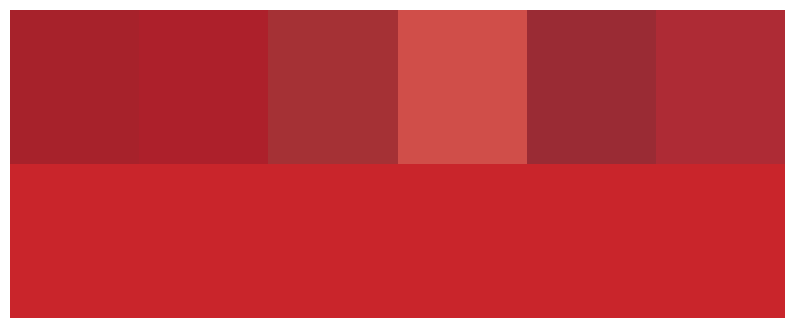

18대 총선 통합민주당의 정당색 사용 벽보 개수 (유사도): 26, 정당색 사용 비율 (유사도): 13.68%


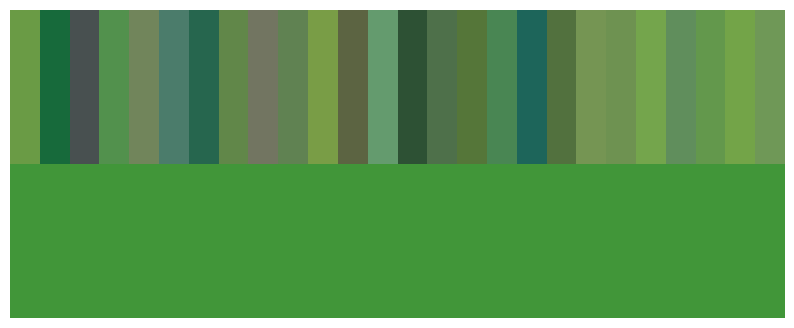

18대 총선 한나라당의 정당색 사용 벽보 개수 (유사도): 68, 정당색 사용 비율 (유사도): 27.98%


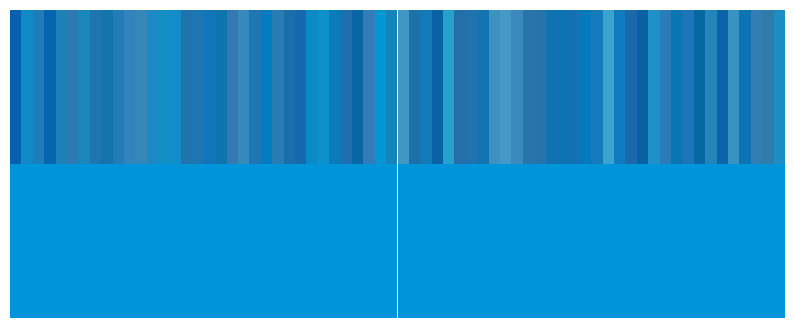

17대 총선 열린우리당의 정당색 사용 벽보 개수 (유사도): 7, 정당색 사용 비율 (유사도): 2.93%


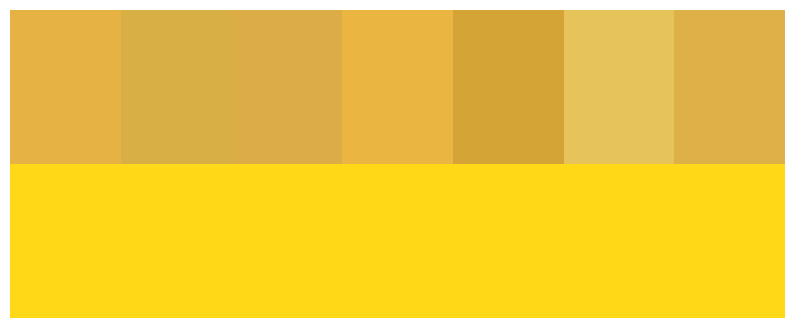

17대 총선 한나라당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
17대 총선 한나라당: 정당색을 사용한 벽보 없음.
16대 총선 새천년민주당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
16대 총선 새천년민주당: 정당색을 사용한 벽보 없음.
16대 총선 한나라당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
16대 총선 한나라당: 정당색을 사용한 벽보 없음.
8대 지선 기초 더불어민주당의 정당색 사용 벽보 개수 (유사도): 21, 정당색 사용 비율 (유사도): 11.17%


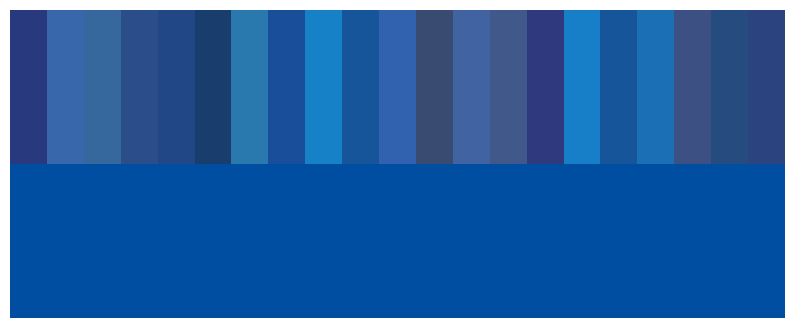

8대 지선 기초 국민의힘의 정당색 사용 벽보 개수 (유사도): 15, 정당색 사용 비율 (유사도): 8.29%


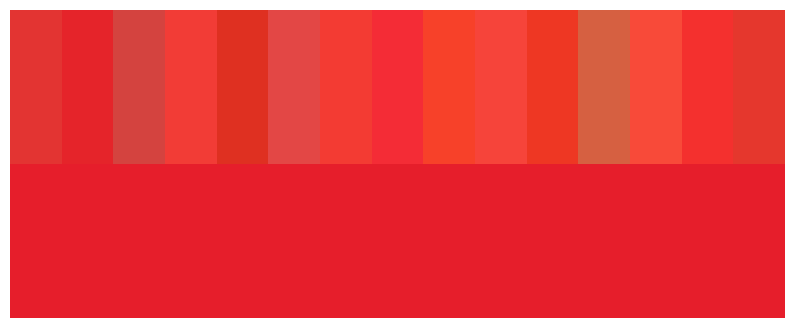

7대 지선 기초 더불어민주당의 정당색 사용 벽보 개수 (유사도): 27, 정당색 사용 비율 (유사도): 13.30%


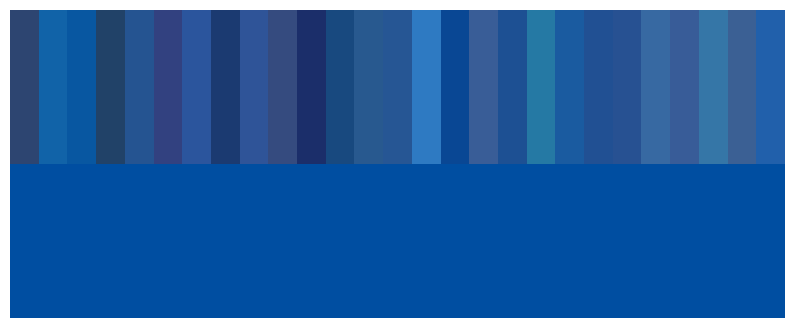

7대 지선 기초 자유한국당의 정당색 사용 벽보 개수 (유사도): 14, 정당색 사용 비율 (유사도): 8.09%


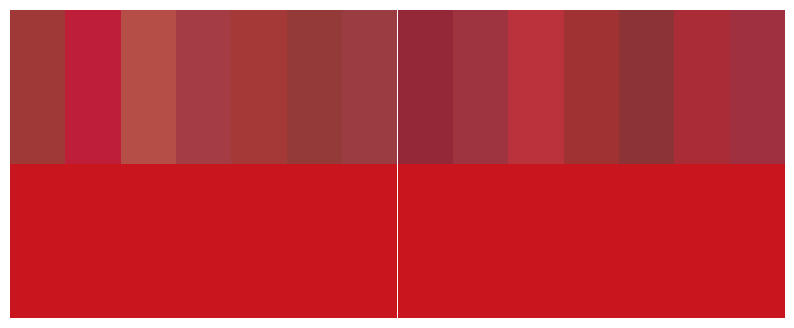

6대 지선 기초 새정치민주연합의 정당색 사용 벽보 개수 (유사도): 49, 정당색 사용 비율 (유사도): 29.88%


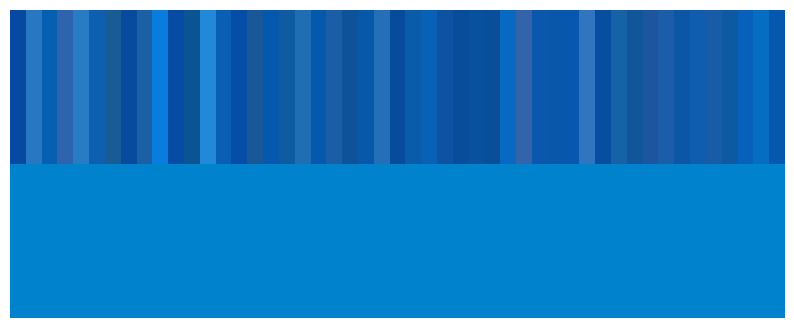

6대 지선 기초 새누리당의 정당색 사용 벽보 개수 (유사도): 27, 정당색 사용 비율 (유사도): 14.75%


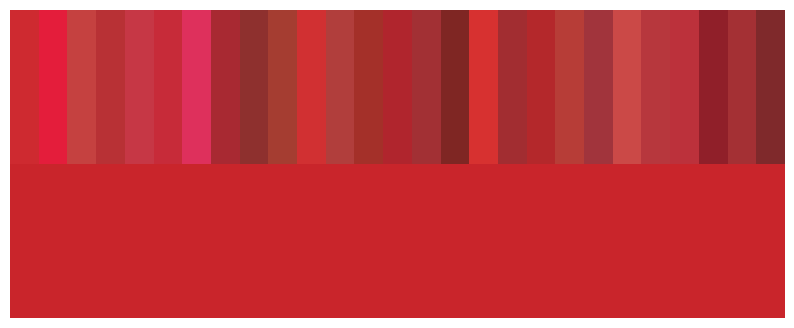

5대 지선 기초 민주당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
5대 지선 기초 민주당: 정당색을 사용한 벽보 없음.
5대 지선 기초 한나라당의 정당색 사용 벽보 개수 (유사도): 23, 정당색 사용 비율 (유사도): 13.22%


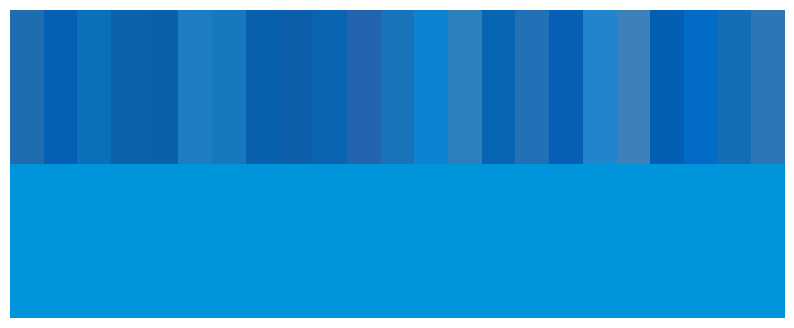

4대 지선 기초 열린우리당의 정당색 사용 벽보 개수 (유사도): 15, 정당색 사용 비율 (유사도): 8.52%


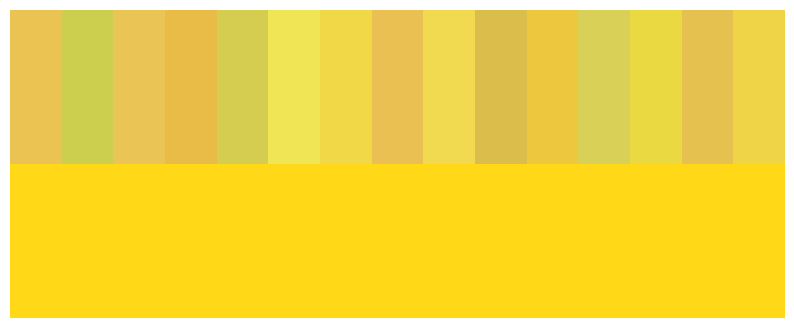

4대 지선 기초 한나라당의 정당색 사용 벽보 개수 (유사도): 14, 정당색 사용 비율 (유사도): 7.41%


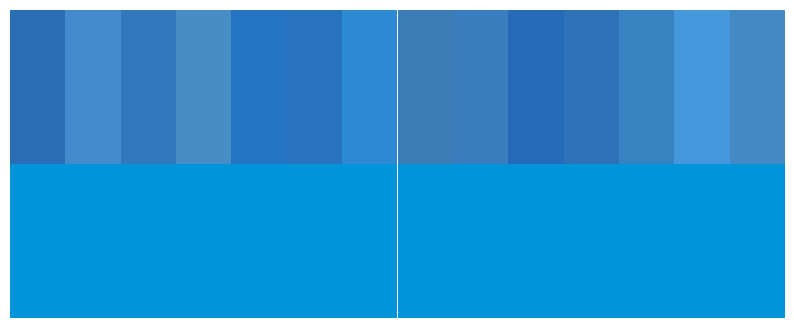

3대 지선 기초 새천년민주당의 정당색 사용 벽보 개수 (유사도): 0, 정당색 사용 비율 (유사도): 0.00%
3대 지선 기초 새천년민주당: 정당색을 사용한 벽보 없음.
3대 지선 기초 한나라당의 정당색 사용 벽보 개수 (유사도): 1, 정당색 사용 비율 (유사도): 0.59%


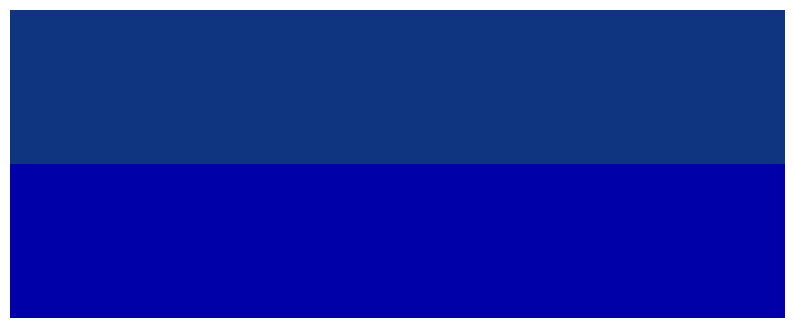

In [ ]:
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# O 개수와 퍼센트 계산 및 색상띠 출력

for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_all_data_with_party_color.csv"

    # CSV 파일 불러오기
    data = pd.read_csv(color_vote_path, encoding='utf-8')

    # simple comparison 75에서 'O'의 개수 세기
    O_count = (data['simple comparison 75'] == 'O').sum()
    O_percentage = (O_count / len(data)) * 100 if len(data) > 0 else 0

    # 개별 파일 결과 출력
    print(f"{name}의 정당색 사용 벽보 개수 (유사도): {O_count}, 정당색 사용 비율 (유사도): {O_percentage:.2f}%")

    # simple comparison 75에서 'O' 값인 행들의 Color Code 1 RGB 추출
    O_data = data[data['simple comparison 75'] == 'O']['Color Code 1'].apply(ast.literal_eval)

    # 정당의 party_color 추출
    party_rgb = ast.literal_eval(data['party color'].iloc[0])  # 모든 행에서 동일한 party color를 가져옴
    party_color = tuple(c / 255 for c in party_rgb)  # 정당의 대표색을 0-1 사이로 정규화

    # 색상띠를 만들기 위한 플롯 설정
    if len(O_data) > 0:  # 'O' 값이 있을 때만 색상띠 출력
        fig, ax = plt.subplots(figsize=(10, 4), dpi=100)  # 전체 플롯 크기 조정
        ax.set_xlim(0, len(O_data))
        ax.set_ylim(0, 2)  # 두 개의 띠를 표시하기 위해 세로 높이 2로 설정
        ax.axis('off')  # 축 표시 제거

        # 첫 번째 색상띠 (유사한 색상들)
        for i, rgb in enumerate(O_data):
            color = tuple(c / 255 for c in rgb)  # RGB 값을 0-1 사이로 정규화
            rect = patches.Rectangle((i, 1), 1, 1, facecolor=color)  # 상단에 유사한 색상 표시
            ax.add_patch(rect)

        # 두 번째 색상띠 (정당의 대표색)
        for i in range(len(O_data)):  # 아래에 동일한 party_color로 띠를 표시
            rect = patches.Rectangle((i, 0), 1, 1, facecolor=party_color)
            ax.add_patch(rect)

        # 색상띠 표시
        plt.show()
        plt.close(fig)
    else:
        print(f"{name}: 정당색을 사용한 벽보 없음.")

## 가중 유클리드 거리 사용 인접 색상 판단

In [ ]:
import ast
import pandas as pd
import math

def color_distance_weighted(rgb1, rgb2, weights=(1, 1, 1)):
    """
    두 RGB 값 간의 유클리드 거리를 계산하되, 각 채널에 가중치를 부여하여 유사도를 측정하는 함수.
    weights: (R, G, B) 가중치
    """
    return math.sqrt(sum(weights[i] * (c1 - c2) ** 2 for i, (c1, c2) in enumerate(zip(rgb1, rgb2))))

def get_color_weights(party_rgb):
    """
    정당색을 기준으로 가중치를 결정하는 함수.
    예를 들어, G 값이 크면 녹색 계열로 판단하여 G 값에 더 높은 가중치를 부여.
    """
    r, g, b = party_rgb

    if g > r and g > b:  # 녹색 계열
        return (0.5, 2, 0.5)  # G에 더 높은 가중치
    elif b > r and b > g:  # 파란색 계열
        return (0.5, 0.5, 2)  # B에 더 높은 가중치
    else:  # 다른 계열 (예: 빨간색)
        return (2, 0.5, 0.5)  # R에 더 높은 가중치

def is_similar_color_weighted(rgb1, rgb2, max_distance=75):
    """
    가중치를 적용한 유클리드 거리를 사용하여 유사도를 판단.
    """
    weights = get_color_weights(rgb2)  # 기준 색상인 party_rgb에 따라 가중치 결정
    return color_distance_weighted(rgb1, rgb2, weights) <= max_distance

# 가중치 적용 유클리드 거리를 이용해 유사도 평가
for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_all_data_with_party_color.csv"

    # color_vote_data 파일 불러오기
    data = pd.read_csv(color_vote_path, encoding='utf-8')

    # 새로운 열을 추가하기 위한 준비
    weighted_results = []

    # 각 행에 대해 Color Code 1과 party color의 비교
    for index, row in data.iterrows():
        color_code_1_rgb = ast.literal_eval(row['Color Code 1'])  # Color Code 1의 RGB 값 추출
        party_rgb = ast.literal_eval(row['party color'])  # Party color의 RGB 값 추출

        # 가중치를 적용한 유클리드 거리를 사용하여 비교
        if is_similar_color_weighted(color_code_1_rgb, party_rgb, max_distance=100):
            weighted_results.append('O')
        else:
            weighted_results.append('X')

    # 기존의 'simple_comparison'은 그대로 두고, 새로운 열 'weighted comparison'에 결과 추가
    data['weighted comparison 75'] = weighted_results

    # 수정된 CSV 파일 저장 (덮어쓰기)
    data.to_csv(color_vote_path, index=False, encoding='utf-8-sig')
    print(f"저장 완료: {color_vote_path}")

21대 총선 더불어민주당의 정당색 사용 벽보 개수 (가중치 유사도): 95, 정당색 사용 비율 (가중치 유사도): 38.15%


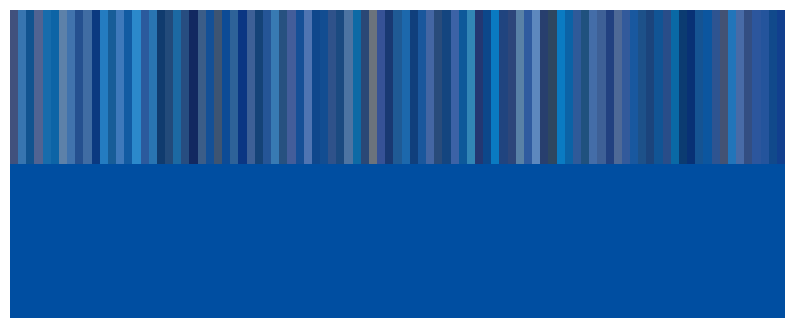

21대 총선 미래통합당의 정당색 사용 벽보 개수 (가중치 유사도): 61, 정당색 사용 비율 (가중치 유사도): 25.85%


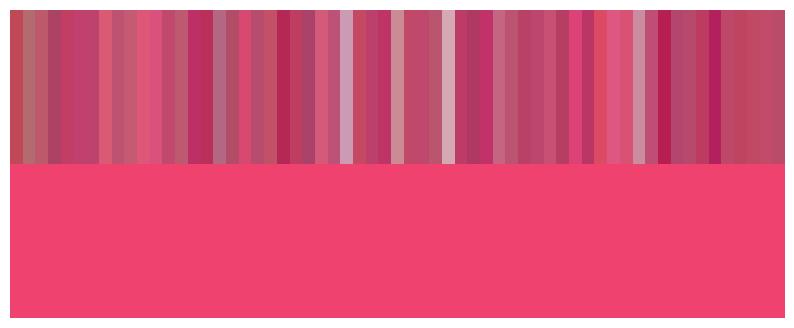

20대 총선 더불어민주당의 정당색 사용 벽보 개수 (가중치 유사도): 68, 정당색 사용 비율 (가중치 유사도): 29.96%


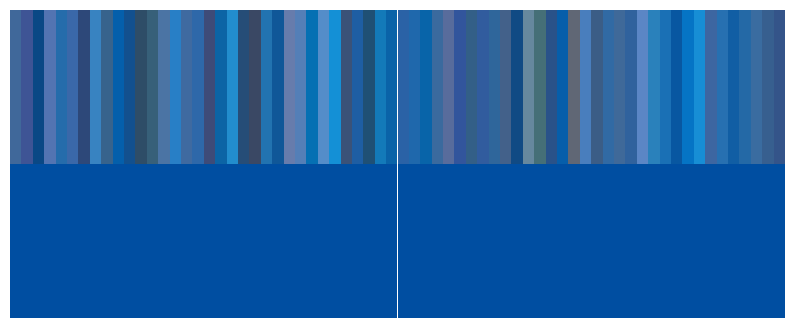

20대 총선 새누리당의 정당색 사용 벽보 개수 (가중치 유사도): 28, 정당색 사용 비율 (가중치 유사도): 11.43%


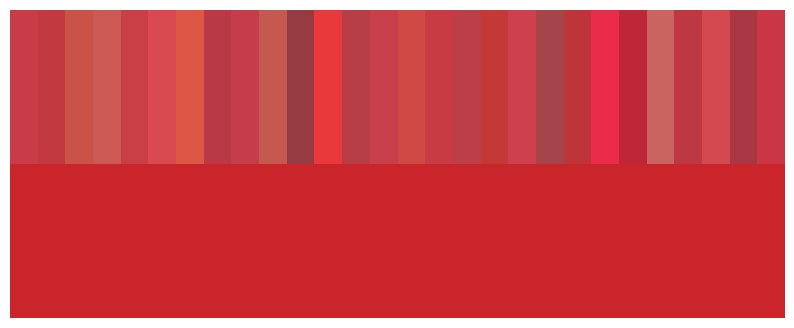

19대 총선 민주통합당의 정당색 사용 벽보 개수 (가중치 유사도): 63, 정당색 사용 비율 (가중치 유사도): 31.50%


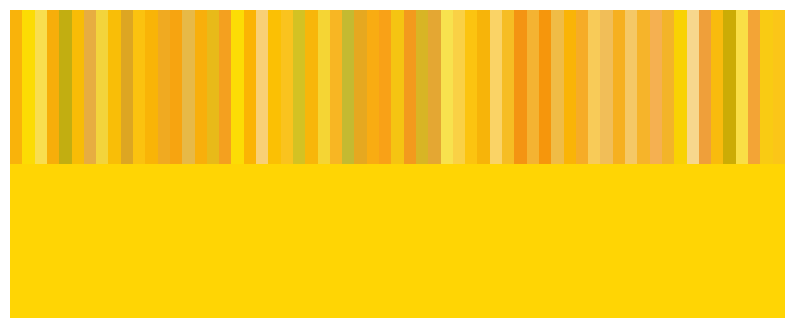

19대 총선 새누리당의 정당색 사용 벽보 개수 (가중치 유사도): 8, 정당색 사용 비율 (가중치 유사도): 3.62%


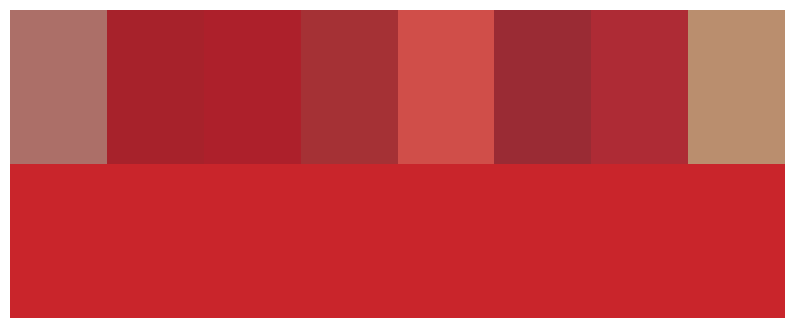

18대 총선 통합민주당의 정당색 사용 벽보 개수 (가중치 유사도): 61, 정당색 사용 비율 (가중치 유사도): 32.11%


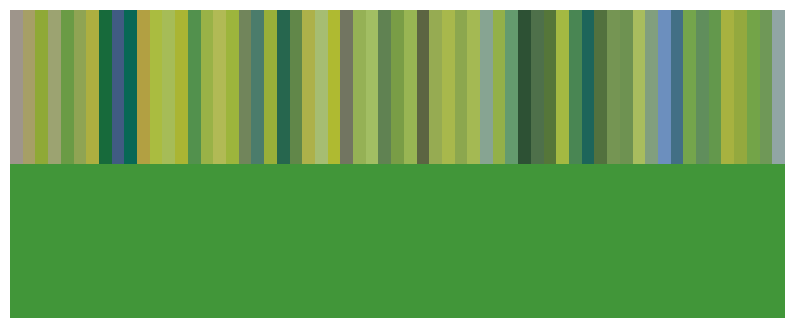

18대 총선 한나라당의 정당색 사용 벽보 개수 (가중치 유사도): 106, 정당색 사용 비율 (가중치 유사도): 43.62%


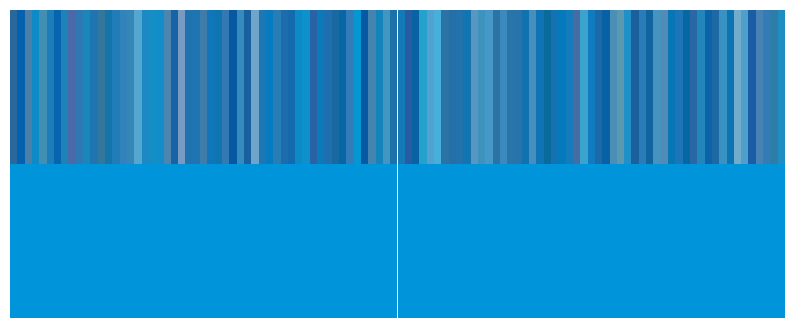

17대 총선 열린우리당의 정당색 사용 벽보 개수 (가중치 유사도): 50, 정당색 사용 비율 (가중치 유사도): 20.92%


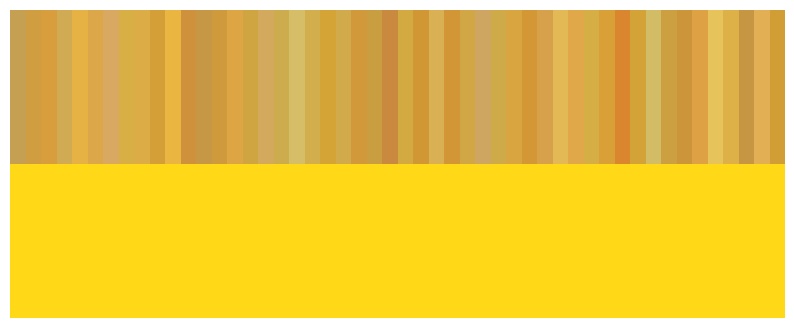

17대 총선 한나라당의 정당색 사용 벽보 개수 (가중치 유사도): 5, 정당색 사용 비율 (가중치 유사도): 2.30%


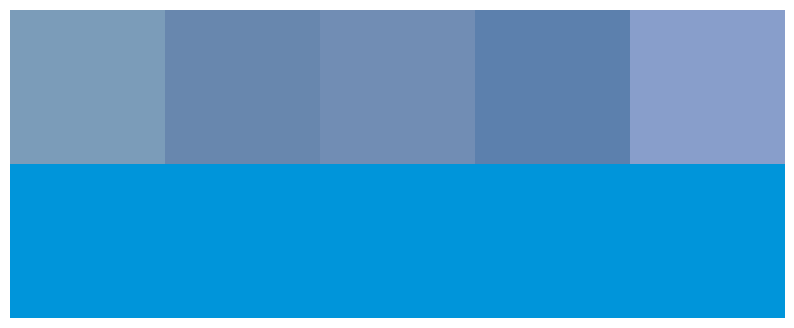

16대 총선 새천년민주당의 정당색 사용 벽보 개수 (가중치 유사도): 4, 정당색 사용 비율 (가중치 유사도): 1.87%


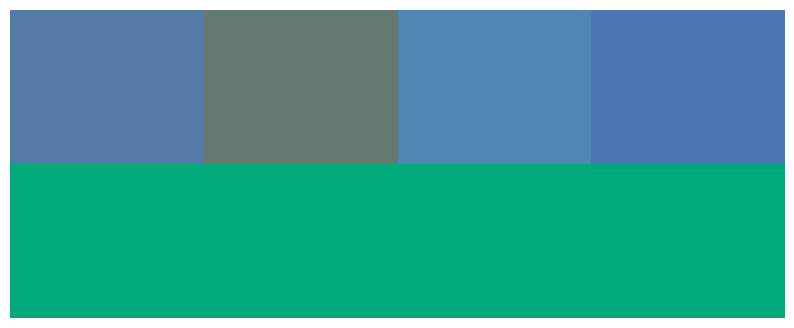

16대 총선 한나라당의 정당색 사용 벽보 개수 (가중치 유사도): 8, 정당색 사용 비율 (가중치 유사도): 3.59%


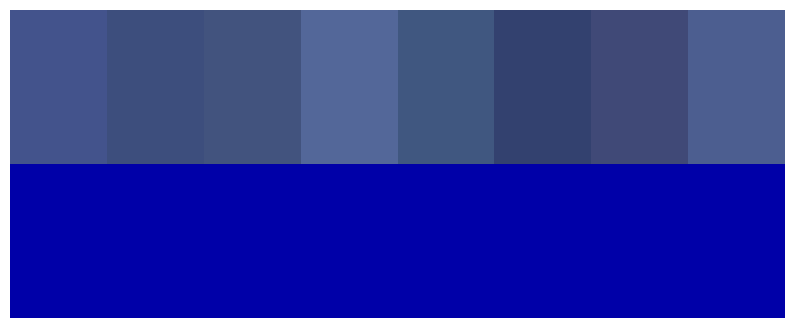

8대 지선 기초 더불어민주당의 정당색 사용 벽보 개수 (가중치 유사도): 24, 정당색 사용 비율 (가중치 유사도): 12.77%


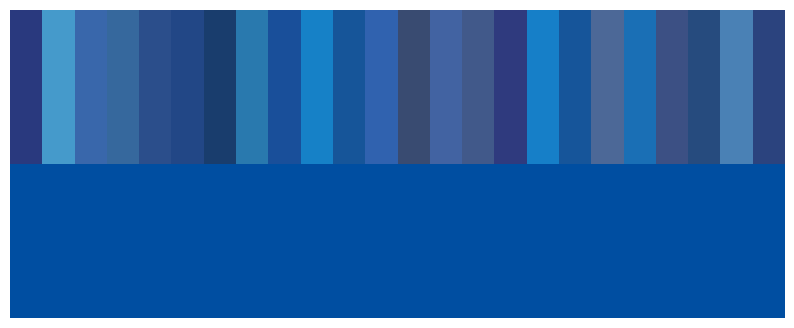

8대 지선 기초 국민의힘의 정당색 사용 벽보 개수 (가중치 유사도): 16, 정당색 사용 비율 (가중치 유사도): 8.84%


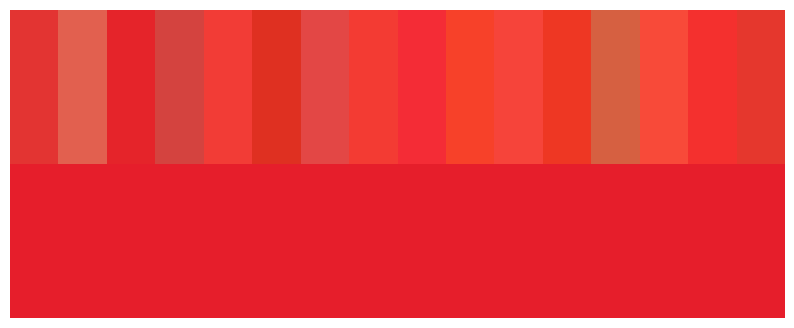

7대 지선 기초 더불어민주당의 정당색 사용 벽보 개수 (가중치 유사도): 37, 정당색 사용 비율 (가중치 유사도): 18.23%


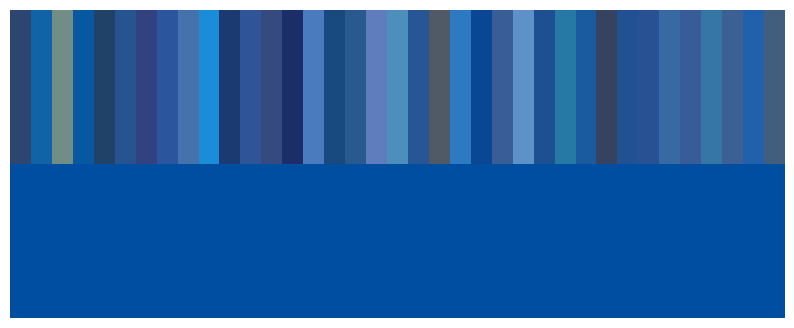

7대 지선 기초 자유한국당의 정당색 사용 벽보 개수 (가중치 유사도): 14, 정당색 사용 비율 (가중치 유사도): 8.09%


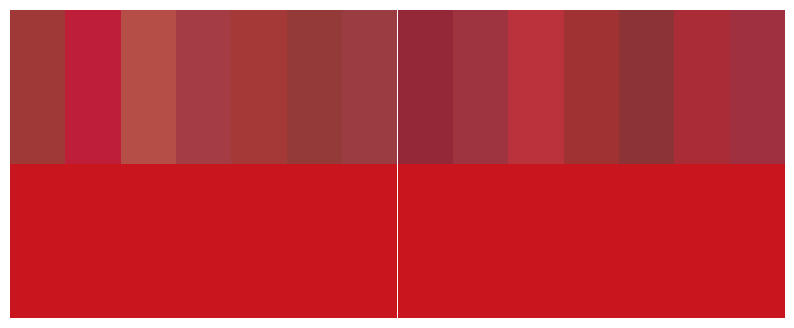

6대 지선 기초 새정치민주연합의 정당색 사용 벽보 개수 (가중치 유사도): 62, 정당색 사용 비율 (가중치 유사도): 37.80%


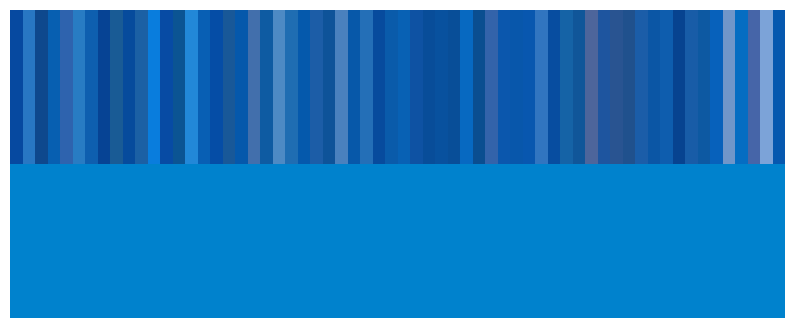

6대 지선 기초 새누리당의 정당색 사용 벽보 개수 (가중치 유사도): 26, 정당색 사용 비율 (가중치 유사도): 14.21%


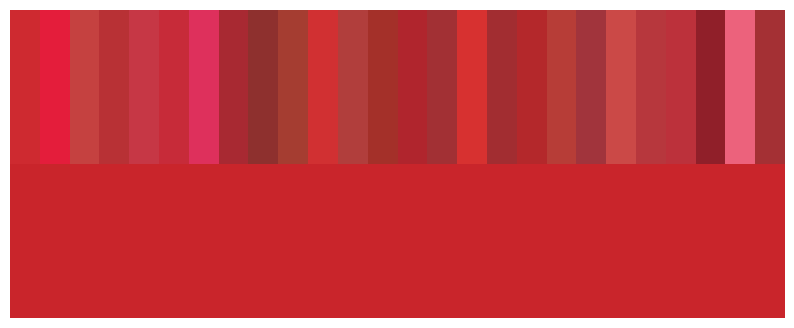

5대 지선 기초 민주당의 정당색 사용 벽보 개수 (가중치 유사도): 20, 정당색 사용 비율 (가중치 유사도): 13.99%


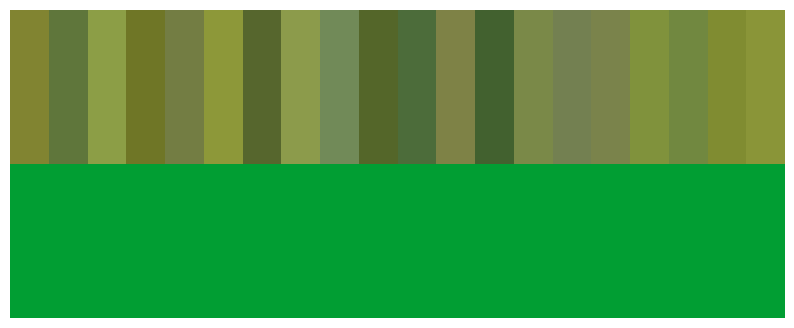

5대 지선 기초 한나라당의 정당색 사용 벽보 개수 (가중치 유사도): 52, 정당색 사용 비율 (가중치 유사도): 29.89%


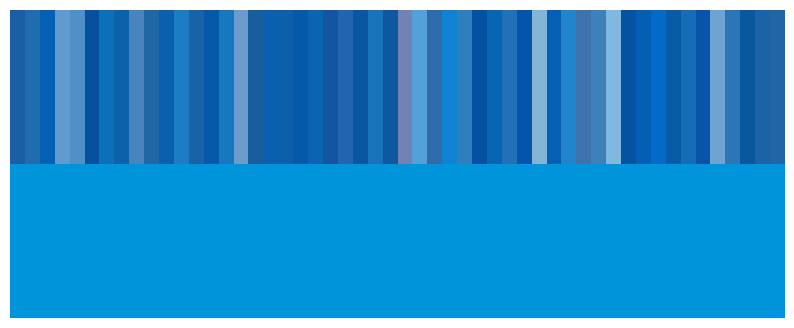

4대 지선 기초 열린우리당의 정당색 사용 벽보 개수 (가중치 유사도): 26, 정당색 사용 비율 (가중치 유사도): 14.77%


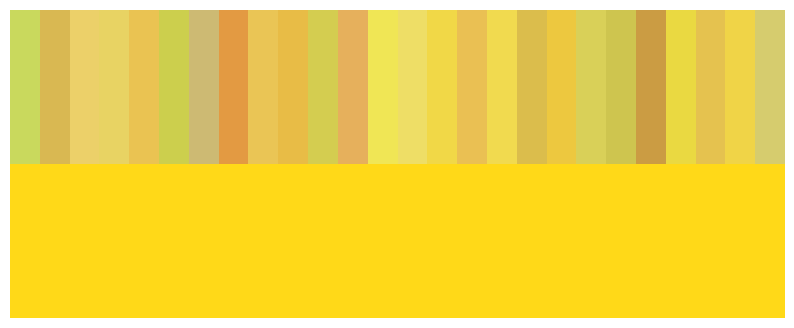

4대 지선 기초 한나라당의 정당색 사용 벽보 개수 (가중치 유사도): 67, 정당색 사용 비율 (가중치 유사도): 35.45%


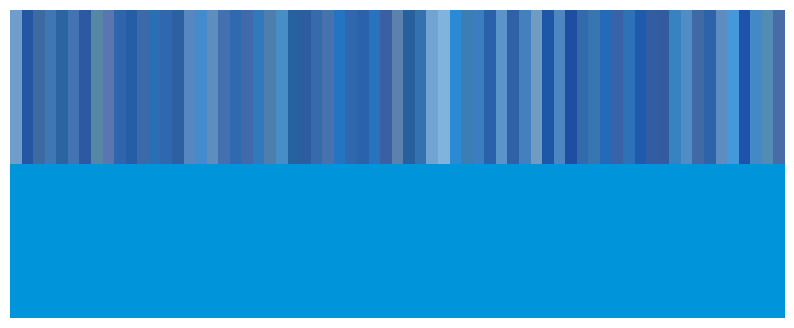

3대 지선 기초 새천년민주당의 정당색 사용 벽보 개수 (가중치 유사도): 9, 정당색 사용 비율 (가중치 유사도): 6.25%


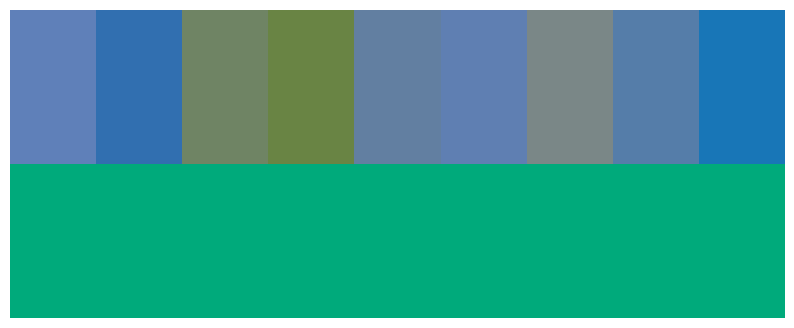

3대 지선 기초 한나라당의 정당색 사용 벽보 개수 (가중치 유사도): 10, 정당색 사용 비율 (가중치 유사도): 5.92%


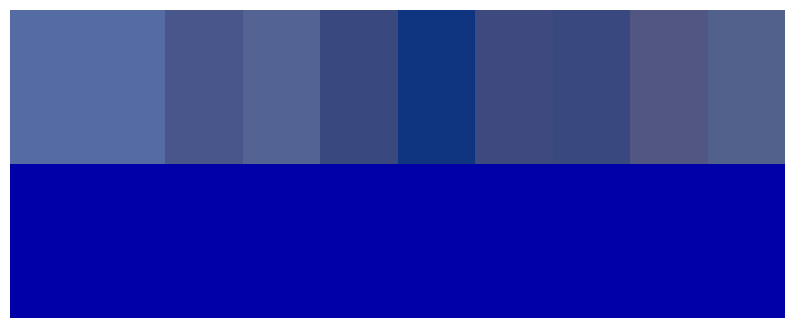

In [ ]:
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# O 개수와 퍼센트 계산 및 색상띠 출력

for name in dir_list:
    directory = output_folder + name
    color_vote_path = directory + "_all_data_with_party_color.csv"

    # CSV 파일 불러오기
    data = pd.read_csv(color_vote_path, encoding='utf-8')

    # weighted comparison 75 에서 'O'의 개수 세기
    O_count = (data['weighted comparison 75'] == 'O').sum()
    O_percentage = (O_count / len(data)) * 100 if len(data) > 0 else 0

    # 개별 파일 결과 출력
    print(f"{name}의 정당색 사용 벽보 개수 (가중치 유사도): {O_count}, 정당색 사용 비율 (가중치 유사도): {O_percentage:.2f}%")

    # weighted comparison 75에서 'O' 값인 행들의 Color Code 1 RGB 추출
    O_data = data[data['weighted comparison 75'] == 'O']['Color Code 1'].apply(ast.literal_eval)

    # 정당의 party_color 추출
    party_rgb = ast.literal_eval(data['party color'].iloc[0])  # 모든 행에서 동일한 party color를 가져옴
    party_color = tuple(c / 255 for c in party_rgb)  # 정당의 대표색을 0-1 사이로 정규화

    # 색상띠를 만들기 위한 플롯 설정
    if len(O_data) > 0:  # 'O' 값이 있을 때만 색상띠 출력
        fig, ax = plt.subplots(figsize=(10, 4), dpi=100)  # 전체 플롯 크기 조정
        ax.set_xlim(0, len(O_data))
        ax.set_ylim(0, 2)  # 두 개의 띠를 표시하기 위해 세로 높이 2로 설정
        ax.axis('off')  # 축 표시 제거

        # 첫 번째 색상띠 (유사한 색상들)
        for i, rgb in enumerate(O_data):
            color = tuple(c / 255 for c in rgb)  # RGB 값을 0-1 사이로 정규화
            rect = patches.Rectangle((i, 1), 1, 1, facecolor=color)  # 상단에 유사한 색상 표시
            ax.add_patch(rect)

        # 두 번째 색상띠 (정당의 대표색)
        for i in range(len(O_data)):  # 아래에 동일한 party_color로 띠를 표시
            rect = patches.Rectangle((i, 0), 1, 1, facecolor=party_color)
            ax.add_patch(rect)

        # 색상띠 표시
        plt.show()
        plt.close(fig)
    else:
        print(f"{name}: 정당색을 사용한 벽보 없음.")